<a href="https://colab.research.google.com/github/decoteau2/MA_Housing_Rent_Analysis/blob/main/01_EDA_MA_Housing_Rent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Massachusetts Housing Rent Analysis**
### **Exploratory Data Analysis & Preprocessing (PUMS 2019–2023)**



This project analyzes housing rent patterns in Massachusetts using Public Use Microdata Sample (PUMS) data from 2019–2023. The analysis explores how household size, housing characteristics, and tenure relate to monthly rent levels, with the goal of generating insights relevant to housing affordability and policy considerations.


In [2]:
# Core libraries
!pip install pandas numpy matplotlib seaborn scikit-learn

# Interactive plots
!pip install plotly


In [3]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Step 1: Mount Google Drive
from google.colab import drive
import os

try:
    drive.mount('/content/drive')
except Exception as e:
    print("Error mounting drive:", e)

# Step 2: Define base project folder
base_dir = '/content/drive/MyDrive/MA_Housing_Rent_Analysis'
data_dir = os.path.join(base_dir, 'data')

# Step 3: Create folders
subfolders = ['data', 'notebooks', 'visualizations', 'reports']
for folder in subfolders:
    path = os.path.join(base_dir, folder)
    if not os.path.exists(path):
        os.makedirs(path)
        print(f"Created folder: {path}")
    else:
        print(f"Folder already exists: {path}")

# Step 4: List files in the data folder to check if CSV is present
if os.path.exists(data_dir):
    files = os.listdir(data_dir)
    print("Files in data folder:", files)
else:
    print("Data folder does not exist yet. Upload csv_hak.csv to this folder.")

# Step 5: Load CSV if it exists
csv_path = os.path.join(data_dir, 'csv_hak.csv')
if os.path.exists(csv_path):
    import pandas as pd
    df = pd.read_csv(csv_path)
    print("CSV loaded successfully! Here are the first 5 rows:")
    display(df.head())
    print("\nData info:")
    df.info()
    print("\nSummary statistics:")
    display(df.describe())
else:
    print("csv_hak.csv not found. Please upload it to the data folder.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Folder already exists: /content/drive/MyDrive/MA_Housing_Rent_Analysis/data
Folder already exists: /content/drive/MyDrive/MA_Housing_Rent_Analysis/notebooks
Folder already exists: /content/drive/MyDrive/MA_Housing_Rent_Analysis/visualizations
Folder already exists: /content/drive/MyDrive/MA_Housing_Rent_Analysis/reports
Files in data folder: ['cleaned_psam_h02.csv']
csv_hak.csv not found. Please upload it to the data folder.


In [5]:
data_dir = '/content/drive/MyDrive/MA_Housing_Rent_Analysis/Data'


In [6]:
import os
import zipfile
import pandas as pd

# Step 1: Correct folder path
data_dir = '/content/drive/MyDrive/MA_Housing_Rent_Analysis/Data'

# Step 2: List files in folder
print("Files in Data folder before extraction:", os.listdir(data_dir))

# Step 3: Extract the ZIP
zip_path = os.path.join(data_dir, 'csv_hak (1).zip')
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(data_dir)  # Extract into the same folder

print("Files in Data folder after extraction:", os.listdir(data_dir))

# Step 4: Load the CSV inside the ZIP (psam_h02.csv)
csv_path = os.path.join(data_dir, 'psam_h02.csv')  # adjust if it has a slightly different name
df = pd.read_csv(csv_path)

print("CSV loaded successfully! Here are the first 5 rows:")
display(df.head())
print("\nData info:")
df.info()
print("\nSummary statistics:")
display(df.describe())


Files in Data folder before extraction: ['csv_hak (1).zip', 'ACS2019_2023_PUMS_README.pdf']
Files in Data folder after extraction: ['csv_hak (1).zip', 'ACS2019_2023_PUMS_README.pdf', 'psam_h02.csv']
CSV loaded successfully! Here are the first 5 rows:


,RT,SERIALNO,DIVISION,PUMA,REGION,STATE,ADJHSG,ADJINC,WGTP,NP,...,WGTP71,WGTP72,WGTP73,WGTP74,WGTP75,WGTP76,WGTP77,WGTP78,WGTP79,WGTP80
0,H,2019GQ0000410,9,400,4,2,1195583,1207712,0,1,...,0,0,0,0,0,0,0,0,0,0
1,H,2019GQ0000600,9,101,4,2,1195583,1207712,0,1,...,0,0,0,0,0,0,0,0,0,0
2,H,2019GQ0000842,9,200,4,2,1195583,1207712,0,1,...,0,0,0,0,0,0,0,0,0,0
3,H,2019GQ0000998,9,102,4,2,1195583,1207712,0,1,...,0,0,0,0,0,0,0,0,0,0
4,H,2019GQ0001073,9,102,4,2,1195583,1207712,0,1,...,0,0,0,0,0,0,0,0,0,0



Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19210 entries, 0 to 19209
Columns: 237 entries, RT to WGTP80
dtypes: float64(145), int64(90), object(2)
memory usage: 34.7+ MB

Summary statistics:


,DIVISION,PUMA,REGION,STATE,ADJHSG,ADJINC,WGTP,NP,TYPEHUGQ,ACCESSINET,...,WGTP71,WGTP72,WGTP73,WGTP74,WGTP75,WGTP76,WGTP77,WGTP78,WGTP79,WGTP80
count,19210.0,19210.000000,19210.0,19210.0,1.921000e+04,1.921000e+04,19210.000000,19210.000000,19210.000000,11482.000000,...,19210.000000,19210.000000,19210.000000,19210.000000,19210.000000,19210.000000,19210.000000,19210.000000,19210.000000,19210.000000
mean,9.0,273.412962,4.0,2.0,1.107387e+06,1.130746e+06,17.054138,1.729412,1.253722,1.228009,...,17.044612,17.052264,17.052056,17.048777,17.049870,17.053826,17.062624,17.048308,17.055075,17.045549
std,0.0,112.802846,0.0,0.0,7.670042e+04,6.999678e+04,25.688718,1.782801,0.626159,0.618719,...,28.948421,29.037896,29.062689,29.266010,29.096052,29.313518,29.268125,28.875290,29.025256,29.420952
min,9.0,101.000000,4.0,2.0,1.000000e+06,1.019518e+06,0.000000,0.000000,1.000000,1.000000,...,-12.000000,-8.000000,-2.000000,-18.000000,-5.000000,-17.000000,-24.000000,-1.000000,-9.000000,-15.000000
25%,9.0,200.000000,4.0,2.0,1.041251e+06,1.085308e+06,3.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,9.0,300.000000,4.0,2.0,1.125501e+06,1.159185e+06,8.000000,1.000000,1.000000,1.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
75%,9.0,400.000000,4.0,2.0,1.179884e+06,1.187140e+06,21.000000,2.000000,1.000000,1.000000,...,20.000000,20.000000,20.000000,20.000000,20.000000,19.000000,20.000000,20.000000,19.000000,20.000000
max,9.0,400.000000,4.0,2.0,1.195583e+06,1.207712e+06,456.000000,20.000000,3.000000,3.000000,...,452.000000,580.000000,522.000000,538.000000,721.000000,606.000000,617.000000,558.000000,539.000000,655.000000


## **2.2 Data Cleaning & Preprocessing**


In [7]:
import pandas as pd
import numpy as np

# -----------------------------
# Step 1: Replace negative/missing codes with NaN for numeric columns
# -----------------------------
numeric_cols = ['MRGP', 'NP', 'BDSP', 'BATH']
for col in numeric_cols:
    df[col] = df[col].apply(lambda x: x if x >= 0 else pd.NA)

# -----------------------------
# Step 2: Drop rows where target MRGP is missing
# -----------------------------
df = df.dropna(subset=['MRGP'])

# -----------------------------
# Step 3: Fill missing numeric values with median
# -----------------------------
df['NP'] = df['NP'].fillna(df['NP'].median())
df['BDSP'] = df['BDSP'].fillna(df['BDSP'].median())
df['BATH'] = df['BATH'].fillna(df['BATH'].median())

# -----------------------------
# Step 4: Encode categorical variables
# -----------------------------
categorical_cols = ['TYPEHUGQ', 'BLD', 'ACCESSINET', 'TEN']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# -----------------------------
# Step 5: Create derived feature: Rent per person
# -----------------------------
df_encoded['Rent_per_person'] = df_encoded['MRGP'] / df_encoded['NP']

# -----------------------------
# Step 6: Quick check
# -----------------------------
print("Data cleaned successfully!")
print("Shape after cleaning:", df_encoded.shape)
display(df_encoded.head())


Data cleaned successfully!
Shape after cleaning: (3981, 245)


/tmp/ipython-input-385539393.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['BDSP'] = df['BDSP'].fillna(df['BDSP'].median())
/tmp/ipython-input-385539393.py:21: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['BATH'] = df['BATH'].fillna(df['BATH'].median())


,RT,SERIALNO,DIVISION,PUMA,REGION,STATE,ADJHSG,ADJINC,WGTP,NP,...,BLD_4.0,BLD_5.0,BLD_6.0,BLD_7.0,BLD_8.0,BLD_9.0,BLD_10.0,ACCESSINET_2.0,ACCESSINET_3.0,Rent_per_person
534,H,2019HU0001507,9,102,4,2,1195583,1207712,34,4,...,False,False,False,False,False,False,False,False,False,600.0
538,H,2019HU0002548,9,300,4,2,1195583,1207712,134,4,...,False,False,False,False,False,False,False,False,False,450.0
543,H,2019HU0004008,9,400,4,2,1195583,1207712,7,2,...,False,False,False,False,False,False,False,True,False,50.0
549,H,2019HU0006662,9,200,4,2,1195583,1207712,59,2,...,False,False,False,False,False,False,False,False,False,700.0
556,H,2019HU0011150,9,102,4,2,1195583,1207712,27,5,...,False,False,False,False,False,False,False,False,False,140.0


In [8]:
#SAVE TO GOOGLE DRIVE
cleaned_csv_path = '/content/drive/MyDrive/MA_Housing_Rent_Analysis/data/cleaned_psam_h02.csv'
df_encoded.to_csv(cleaned_csv_path, index=False)
print("Cleaned dataset saved to:", cleaned_csv_path)


Cleaned dataset saved to: /content/drive/MyDrive/MA_Housing_Rent_Analysis/data/cleaned_psam_h02.csv


### **2.1 Exploratory Data Analysis (EDA)**


This section explores the structure, distributions, and relationships within the cleaned PUMS housing dataset. Visualizations are based on the cleaned data and are used to understand rent patterns and key housing characteristics prior to model development.



### 2.1.1 Distribution of Monthly Gross Rent (MRGP)


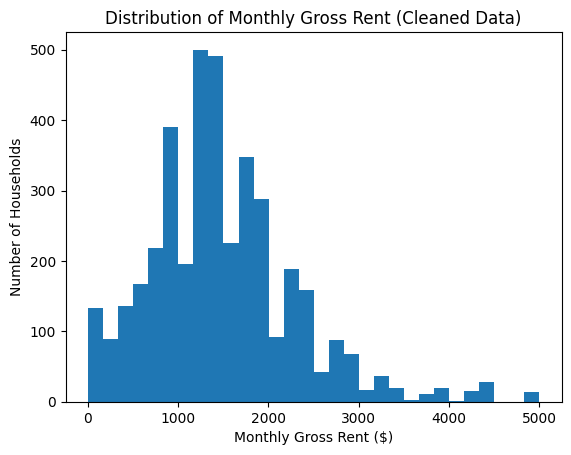

In [9]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(df_encoded['MRGP'], bins=30)
plt.xlabel('Monthly Gross Rent ($)')
plt.ylabel('Number of Households')
plt.title('Distribution of Monthly Gross Rent (Cleaned Data)')
plt.show()


### **2.1.2 Household Size (NP) vs Monthly Gross Rent (MRGP)**

This subsection examines how household size (number of persons, NP) relates to monthly gross rent.
A boxplot is used to compare rent distributions across different household sizes and identify trends
in housing costs as household size increases.


<Figure size 640x480 with 0 Axes>

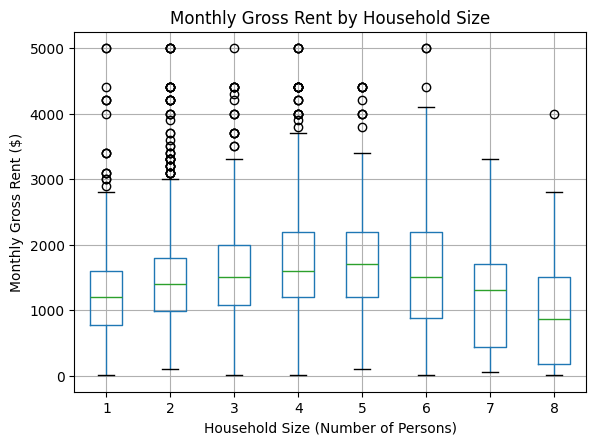

In [10]:
import matplotlib.pyplot as plt

# Remove extreme household sizes to keep plot readable
eda_df = df_encoded[df_encoded['NP'] <= 8]

plt.figure()
eda_df.boxplot(column='MRGP', by='NP')
plt.xlabel('Household Size (Number of Persons)')
plt.ylabel('Monthly Gross Rent ($)')
plt.title('Monthly Gross Rent by Household Size')
plt.suptitle('')  # removes automatic pandas subtitle
plt.show()


### **2.1.3 Number of Bedrooms (BDSP) vs Rent per Person**

This subsection examines how the number of bedrooms relates to rent per person.
Rent per person is calculated as monthly gross rent divided by household size,
allowing for comparison of housing cost efficiency across different bedroom counts.


<Figure size 640x480 with 0 Axes>

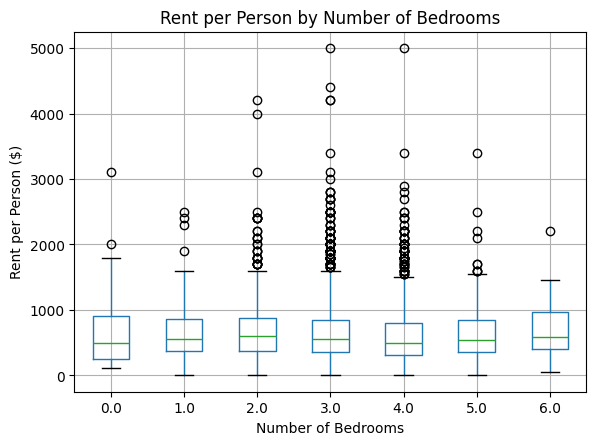

In [11]:
import matplotlib.pyplot as plt

# Keep reasonable bedroom counts
eda_df = df_encoded[df_encoded['BDSP'] <= 6]

plt.figure()
eda_df.boxplot(column='Rent_per_person', by='BDSP')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Rent per Person ($)')
plt.title('Rent per Person by Number of Bedrooms')
plt.suptitle('')
plt.show()


### **2.1.4 Housing Characteristics and Monthly Gross Rent**

This subsection explores how selected housing characteristics relate to monthly gross rent.
Boxplots are used to compare rent distributions across housing types, tenure status,
and building characteristics to identify patterns in housing costs.


### **2.1.4.1 Housing Type (TYPEHUGQ) vs Monthly Gross Rent**

**Interpretation:**  
Monthly gross rent varies across housing types, with differences in median rent levels and dispersion suggesting that housing type is associated with housing costs.

**Limitations:**  
Some housing type categories contain relatively few observations, which may limit the ability to detect meaningful differences in rent levels across all housing types.


<Figure size 640x480 with 0 Axes>

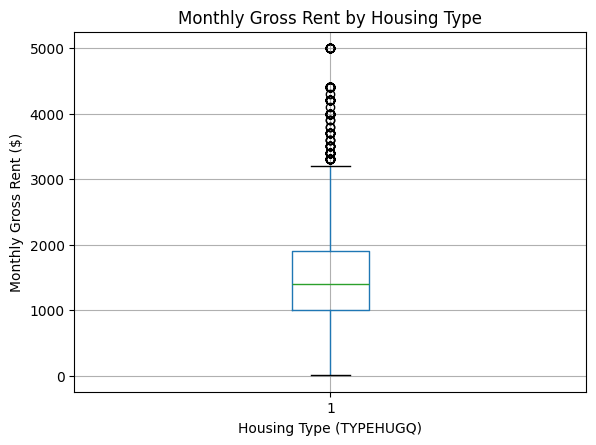

In [14]:
import matplotlib.pyplot as plt

plt.figure()
df.boxplot(column='MRGP', by='TYPEHUGQ')
plt.xlabel('Housing Type (TYPEHUGQ)')
plt.ylabel('Monthly Gross Rent ($)')
plt.title('Monthly Gross Rent by Housing Type')
plt.suptitle('')
plt.show()



### **2.1.4.2 Tenure Status (TEN) vs Monthly Gross Rent**

**Interpretation:**  
The observed rent distribution reflects variation among renter-occupied households, highlighting differences in monthly housing costs within the rental market.

**Limitations:**  
This analysis is limited because the cleaned dataset primarily includes renter-occupied households (TEN = 1). As a result, variation in rent by tenure status cannot be fully evaluated, and comparisons between renter- and owner-occupied units are not possible.


<Figure size 640x480 with 0 Axes>

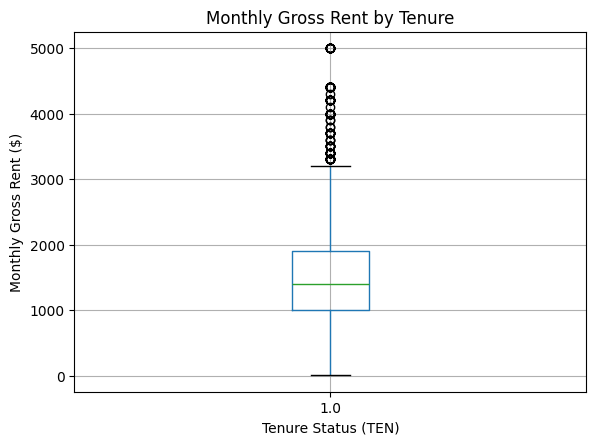

In [15]:
plt.figure()
df.boxplot(column='MRGP', by='TEN')
plt.xlabel('Tenure Status (TEN)')
plt.ylabel('Monthly Gross Rent ($)')
plt.title('Monthly Gross Rent by Tenure')
plt.suptitle('')
plt.show()



### **2.1.4.3 Building Structure (BLD) vs Monthly Gross Rent**

**Interpretation:**  
Monthly gross rent varies by building structure, with larger multi-unit buildings generally exhibiting higher median rents and greater variability compared to smaller or low-density structures.

**Limitations:**  
Some building structure categories have limited observations after cleaning and filtering, which may reduce the ability to identify statistically distinct rent patterns across all building types.




<Figure size 640x480 with 0 Axes>

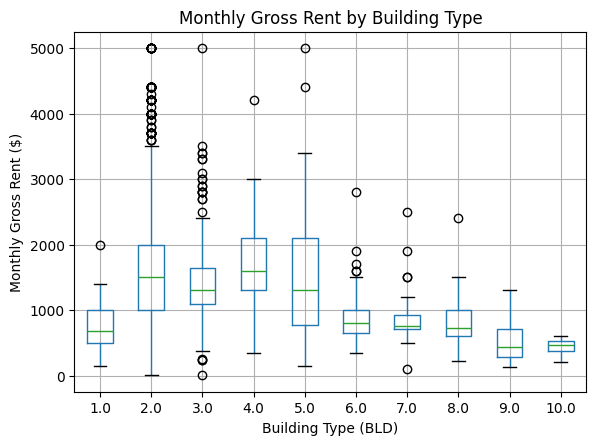

In [16]:
plt.figure()
df.boxplot(column='MRGP', by='BLD')
plt.xlabel('Building Type (BLD)')
plt.ylabel('Monthly Gross Rent ($)')
plt.title('Monthly Gross Rent by Building Type')
plt.suptitle('')
plt.show()


## **2.2 Modeling Preparation**

In this section, we prepare the cleaned and encoded dataset (`df_encoded`) for predictive modeling by selecting features, defining the target variable, splitting data into train/test sets, and scaling numeric features where appropriate.


In [17]:
# 2.2.2 Define target and features
target = "MRGP"

# Drop target from features
X = df_encoded.drop(columns=[target])
y = df_encoded[target]

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (3981, 244)
y shape: (3981,)


In [18]:
# 2.2.3 — Train/test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

print("Train:", X_train.shape, y_train.shape)
print("Test: ", X_test.shape, y_test.shape)


Train: (3184, 244) (3184,)
Test:  (797, 244) (797,)


In [19]:
# 2.2.4 — Scale numeric columns only
from sklearn.preprocessing import StandardScaler

# Identify numeric columns
numeric_cols = X_train.select_dtypes(include=["int64", "float64"]).columns

scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

print("Scaled train/test created.")


Scaled train/test created.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [21]:
# 2.2.5 Data integrity checks (pandas-safe)

print("Missing values in X_train_scaled:")
print(X_train_scaled.isna().sum().sum())

print("Missing values in X_test_scaled:")
print(X_test_scaled.isna().sum().sum())

print("Missing values in y_train:", y_train.isna().sum())
print("Missing values in y_test:", y_test.isna().sum())


Missing values in X_train_scaled:
35380
Missing values in X_test_scaled:
8891
Missing values in y_train: 0
Missing values in y_test: 0


In [22]:
# Identify columns causing NaNs after scaling
nan_cols = X_train_scaled.columns[X_train_scaled.isna().any()].tolist()

print("Number of columns with NaNs:", len(nan_cols))
nan_cols[:10]  # preview first 10


Number of columns with NaNs: 26


['ACR',
 'AGS',
 'BROADBND',
 'DIALUP',
 'ELEP',
 'FULP',
 'GASP',
 'HISPEED',
 'MHP',
 'OTHSVCEX']

In [23]:
# Fix NaNs introduced during scaling
X_train_scaled = X_train_scaled.fillna(0)
X_test_scaled = X_test_scaled.fillna(0)


/tmp/ipython-input-1187125332.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train_scaled = X_train_scaled.fillna(0)
/tmp/ipython-input-1187125332.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test_scaled = X_test_scaled.fillna(0)


In [24]:
print("Missing values in X_train_scaled:", X_train_scaled.isna().sum().sum())
print("Missing values in X_test_scaled:", X_test_scaled.isna().sum().sum())


Missing values in X_train_scaled: 0
Missing values in X_test_scaled: 0


After scaling, a small number of missing values were observed in sparse,
one-hot encoded utility and service-related variables. These were addressed
by replacing missing values with zeros, which is appropriate for encoded
categorical indicators. Final integrity checks confirmed that all training
and testing feature matrices contained no missing values.
